## Лекція 57. Піксельні операції

### Завдання:

Можна використовувати бібліотеку PIL або бібліотеку openCV

1.	Створіть функцію для зчитування зображення з диску та його відображення на екрані.

2.	Створіть функцію для збереження зображення на диск.

3.	Створіть функції для реалізації наступних піксельних операцій:

    -	зміна контрастності (задания коефіцієнту контрастності та яскравості);

    -	зміна яскравості (задания коефіцієнту яскравості);

    -	зміна насиченості (задания коефіцієнту насиченості);

    -	зміна розміру зображення (задания нової ширини та висоти);

    -	обрізання зображення (задания координат початку та кінця обрізання);

    -	поворот зображення на заданий кут (задания кута повороту в градусах).

In [168]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

### 1) Створіть функцію для зчитування зображення з диску та його відображення на екрані.

In [89]:
# Функція для завантаження зображеня і відображення на екрані
def load_show(file):
    img = cv2.imread(file, cv2.IMREAD_COLOR)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.axis('off')
    plt.show
    return img

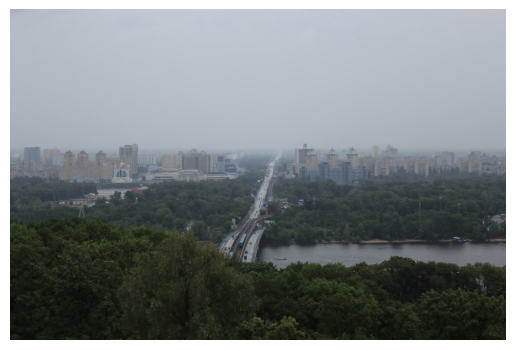

In [90]:
# Завантажуємо файл через функцію
image = load_show('149.jpg')

In [91]:
# Функція для завантаження зображеня
def load(file):
    img = cv2.imread(file, cv2.IMREAD_COLOR)
    return img

# Функція для завантаження зображеня в RGB
def load_RGB(file):
    img = cv2.imread(file, cv2.IMREAD_COLOR)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img_RGB

### 2)Створіть функцію для збереження зображення на диск.

In [92]:
# Функція запису зображення на диск
def write(img):
    name = input('Введіть назву файлу для збереження: ')
    file_name = name + '.jpg'
    cv2.imwrite(file_name, img)
    return print(f'Зображення {file_name} збережено на диск')

In [94]:
# Зберігаємо файл на диск
wr = write(load('149.jpg'))

Введіть назву файлу для збереження:  rgb


Зображення rgb.jpg збережено на диск


### 3) Створіть функції для реалізації наступних піксельних операцій:

#### - зміна контрастності (автоматична)

In [76]:
def auto_contrast(img):
    clahe = cv2.createCLAHE(clipLimit=3., tileGridSize=(8,8)) # CLAHE (Contrast Limited Adaptive Histogram Equalization)
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)                # convert from BGR to LAB color space
    l, a, b = cv2.split(lab)                                  # split on 3 different channels
    l2 = clahe.apply(l)                                       # apply CLAHE to the L-channel
    lab = cv2.merge((l2,a,b))                                 # merge channels
    return cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)               # convert from LAB to RGB

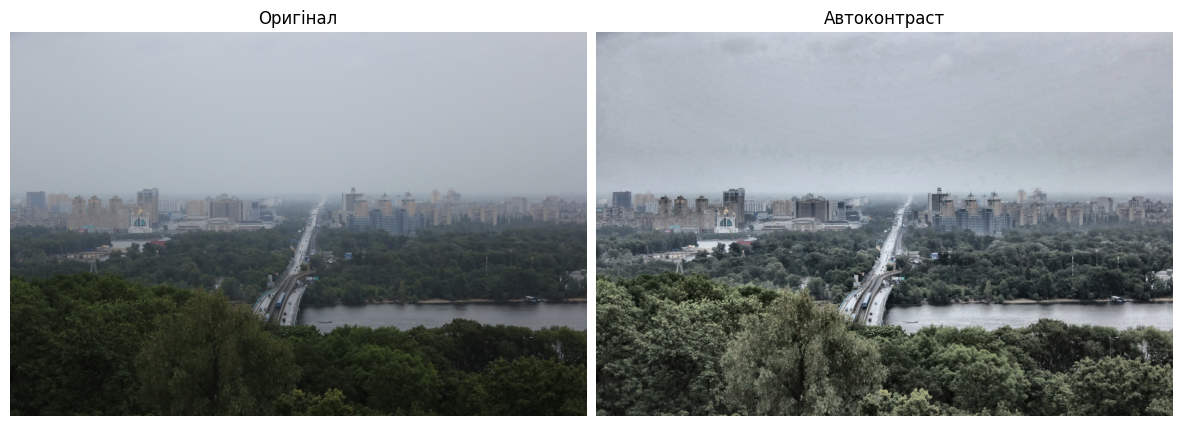

In [109]:
# Порівнюємо зображення

im = load_RGB('149.jpg')
img = load('149.jpg')
auto = auto_contrast(img)
# Список рисунків
list_images = [im, auto]

# Візуалізація
fig = plt.figure(figsize=(15, 15))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 2),  # сітка 1 на 2
                 axes_pad=0.1  # відстань між рисунками
                 )
# Підписи
titles = ['Оригінал', 'Автоконтраст']

for ax, im, titles in zip(grid, list_images, titles):
    # Ітерація по сітці
    ax.axis('off')
    ax.imshow(im)
    ax.set_title(titles)

plt.show()

#### -	зміна насиченості (задания коефіцієнту насиченості)

In [104]:
# Функція зміни кольорової насиченості зображення

def change_saturation(img):
    x=float(input('Введіть коефіціент зміни кольорової насиченості зображення [0:5] : '))
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)   # Конвертуємо зображення з формату BGR в HSV
    hsv_img[:, :, 1] = hsv_img[:, :, 1] * x          # Збільшуємо / зменшуємо насиченість
    satur = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)  # Перетворюємо зображення з формату HSV в RGB
    return satur

Введіть коефіціент зміни кольорової насиченості зображення [0:5] :  3


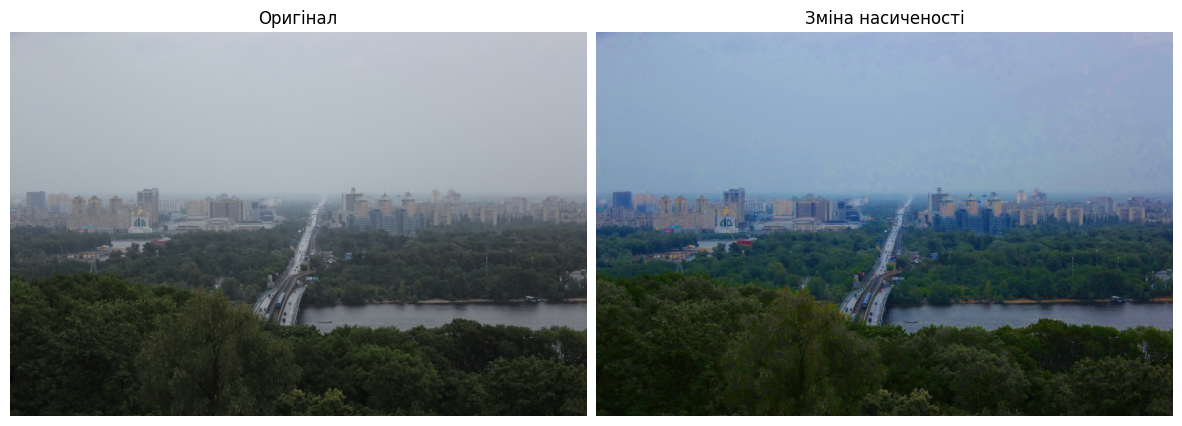

In [130]:
# Порівнюємо зображення

im = load_RGB('149.jpg')
img = load('149.jpg')
sat = change_saturation(img)
# Список рисунків
list_images = [im, sat]

# Візуалізація
fig = plt.figure(figsize=(15, 15))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 2),  # сітка 1 на 2
                 axes_pad=0.1  # відстань між рисунками
                 )
# Підписи
titles = ['Оригінал', 'Зміна насиченості']

for ax, im, titles in zip(grid, list_images, titles):
    # Ітерація по сітці
    ax.axis('off')
    ax.imshow(im)
    ax.set_title(titles)

plt.show()

####  -	зміна контрастності (задания коефіцієнту контрастності та яскравості)

In [111]:
def change_contrast(img, alpha, beta):
    # Змінюємо контраст
    new_image = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    return new_image
# коефіцієнт контрастності (alpha) та значення яскравості (beta). 
# Коефіцієнт контрастності може бути значенням від 0.0 до будь-якого числа, яке вибирається користувачем, 
# а значення яскравості може бути значенням від 0 до 100, яке вибирається користувачем.

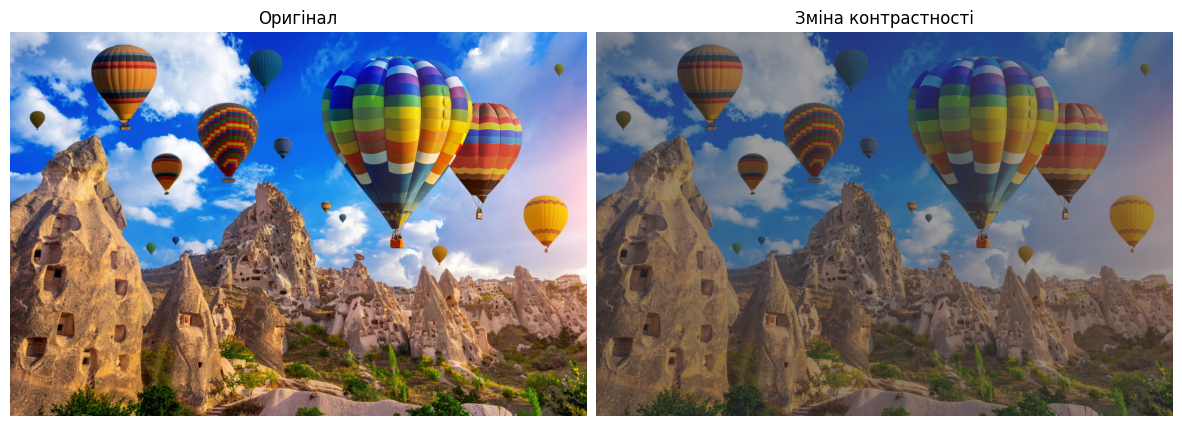

In [133]:
# Порівнюємо зображення

im = load_RGB('123.jpg')
img = load('123.jpg')
sat1 = change_contrast(img, 0.5, 30)
sat = cv2.cvtColor(sat1, cv2.COLOR_BGR2RGB)
# Список рисунків
list_images = [im, sat]

# Візуалізація
fig = plt.figure(figsize=(15, 15))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 2),  # сітка 1 на 2
                 axes_pad=0.1  # відстань між рисунками
                 )
# Підписи
titles = ['Оригінал', 'Зміна контрастності']

for ax, im, titles in zip(grid, list_images, titles):
    # Ітерація по сітці
    ax.axis('off')
    ax.imshow(im)
    ax.set_title(titles)

plt.show()

####  -	зміна яскравості (задания коефіцієнту яскравості)

In [134]:
def change_brightness(img, value):
    # Змінюємо яскравість
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v += value
    final_hsv = cv2.merge((h, s, v))
    new_image = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2RGB)
    return new_image

# Значення яскравості може бути значенням від -255 до 255, 
# де значення більше 0 збільшує яскравість, а значення менше 0 зменшує.

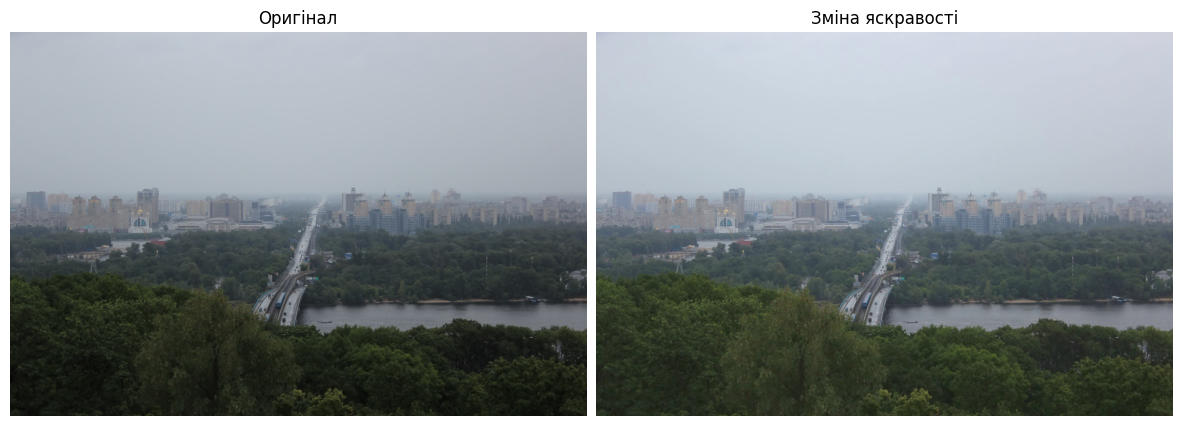

In [146]:
# Порівнюємо зображення

im = load_RGB('149.jpg')
img = load('149.jpg')
sat = change_brightness(img, 20)

# Список рисунків
list_images = [im, sat]

# Візуалізація
fig = plt.figure(figsize=(15, 15))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 2),  # сітка 1 на 2
                 axes_pad=0.1  # відстань між рисунками
                 )
# Підписи
titles = ['Оригінал', 'Зміна яскравості']

for ax, im, titles in zip(grid, list_images, titles):
    # Ітерація по сітці
    ax.axis('off')
    ax.imshow(im)
    ax.set_title(titles)

plt.show()

####       -	обрізання зображення (задания координат початку та кінця обрізання)

In [169]:
#  Функція обрізання фотографії
def cropped(img, x1, y1, x2, y2):
    return img[x1:x2,y1:y2]

In [164]:
im = load_RGB('149.jpg')
im.shape

(2304, 3456, 3)

In [177]:
im = load_RGB('149.jpg')
sat = crop_image(im, 300, 300, 1500, 1500)
sat.shape

(1200, 1200, 3)

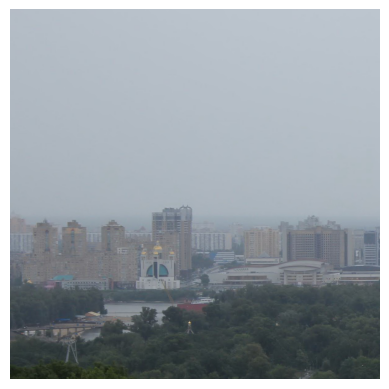

In [179]:
plt.imshow(sat)
plt.axis('off')
plt.show;

#### - зміна розміру зображення (задания нової ширини та висоти)

In [180]:
def resize_image(img, width, height):
    resized_img = cv2.resize(img, (width, height))
    return resized_img

In [189]:
im = load_RGB('149.jpg')
print(f'розмір зображення {im.shape[0]} x {im.shape[1]}')

розмір зображення 2304 x 3456


In [187]:
sat = resize_image(im, 1600, 1200)
print(f'розмір зображення {sat.shape[0]} x {sat.shape[1]}')

розмір зображення 1200 x 1600


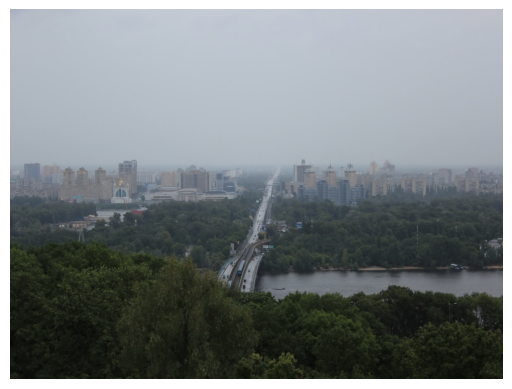

In [188]:
plt.imshow(sat)
plt.axis('off')
plt.show;

#### -	поворот зображення на заданий кут (задания кута повороту в градусах)

In [191]:
def rotate_image(img, angle):
    # Отримуємо висоту та ширину зображення
    (h, w) = img.shape[:2]
    # Обчислюємо центр зображення
    center = (w / 2, h / 2)
    # Обчислюємо матрицю перетворення та повертаємо зображення
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_img = cv2.warpAffine(img, M, (w, h))
    return rotated_img

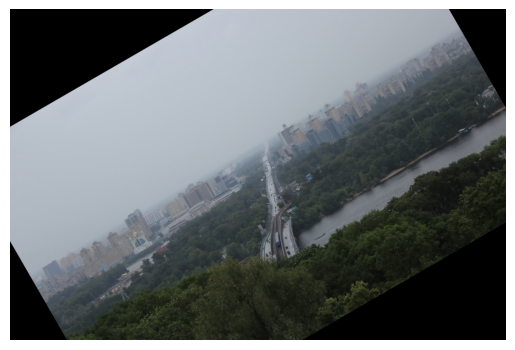

In [193]:
sat = rotate_image(im, 30)
plt.imshow(sat)
plt.axis('off')
plt.show;